# Analysis for factors that may account for the difference in Box Office

Using the interaction plots here because some of the data may share common features and may also concentrate on 
one small area,i.e. zooming is required. Besides, when conducting detailed analysis about the Director factor, for each director we also have many categories lie under each person,
therefore, flexible axis which can be determined by users are reasonable and necessary.

Note : Here use bohek and holoviews and matplotlib and seaborn,plotnine for visualization.

### Part 1: Popularity effect (rating and popularity from Douban and IMDB)

In [101]:
import bokeh.io

bokeh.io.output_notebook()

Loading BokehJS ...

In [102]:
import bokeh.layouts
import bokeh.models
import bokeh.plotting

In [2]:
import pandas as pd

In [4]:
'''loading the rating data'''
df1=pd.read_csv("D:\\softdata_file\\GITHUB\\sta141b-proj--zhang-zhao\\Rating.csv")
df1

,Name,IMDbPopularity,IMDbRate,DoubanRate,ChineseBoxOfficeRank,AmericanBoxOfficeRank,WorldwideBoxOfficeRank
0,xXx: Return of Xander Cage,174,5.2,5.6,13,60,28
1,Geostorm,97,5.4,6.0,38,75,43
2,The Fate of the Furious,148,6.7,7.0,2,12,3
3,The Mummy,61,5.5,4.7,25,39,22
4,Transformers: The Last Knight,177,5.2,4.8,7,25,16
5,Kong: Skull Island,192,6.7,7.8,9,19,21
6,A Dog’s Purpose,914,6.9,7.7,26,44,46


In [56]:
'''loading the box office data'''
df2=pd.read_excel("D:\\school in california\\Aucdavis\\second quarter\\141B\\final project\\data\\movie.xlsx")
df2

,Worldwide Rank,Movie,Worldwide Box Office,Domestic Box Office,International Box Office,Domestic Share,China Box Office,Chinese actor,China‘s Share
0,26,xXx: Return of Xander Cage,345114933,44898413,300216520,0.1301,163650000,"Zidan Zhen, Wu Yifan",0.545107
1,44,Geostorm,216000160,33700160,182300000,0.1560,65300000,Yanzu Wu,0.358201
2,3,The Fate of the Furious,1237466026,225764765,1011701261,0.1824,392100000,NaN,0.387565
3,21,The Mummy,410333326,80101125,330232201,0.1952,91500000,NaN,0.277078
4,16,Transformers: The Last Knight,603968683,130168683,473800000,0.2155,229460000,NaN,0.484297
5,11,Kong: Skull Island,794758876,172558876,622200000,0.2171,172300000,NaN,0.276921
6,46,A Dog’s Purpose,198421890,64321890,134100000,0.3242,88730000,NaN,0.661670


First of all, we want to see if there is any relation between the IMDbPopularity and IMDbRate, because you know, 
sometimes people may rate something more objective, while popularity may seem to related to personal preference more.

In [6]:
'''size of the points representing the box office'''
'''color and shape of the points representing the domestic value or the Chinese one'''
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.models.annotations import Arrow
from bokeh.models.arrow_heads import OpenHead, NormalHead, VeeHead
from bokeh.plotting import figure, show, output_file


x=df1["IMDbPopularity"]
y=df1["IMDbRate"]
x_end=[x[0],x[1],500,500,500,500,x[6]]
y_end=[y[0],y[1],5.6,6,6.4,7,y[6]]
z=df2["Domestic Box Office"]
z=[int(z[i]/(10**7)) for i in range(0,len(z))]
w=df2["China Box Office"]
w=[int(w[i]/(10**7)) for i in range(0,len(w))]
p = figure(plot_width=600, plot_height=600)

p.square(x, y, color="green", alpha=0.5,size=z)
p.circle(x, y, color="orange", alpha=0.5,size=w)

p.xaxis.axis_label = 'Popularity score'
p.yaxis.axis_label = 'Rate score'
source = ColumnDataSource(data=dict(
    temp=x_end,
    pressure=y_end,
    names=df1["Name"]))
labels = LabelSet(x='temp', y='pressure', text='names', level='glyph',text_baseline="bottom",
                  x_offset=5, y_offset=5, source=source, render_mode='canvas',text_font_size="10pt")


p.add_layout(labels)

# p.add_layout(Arrow(end=OpenHead(line_color="red", line_width=1),
#                    x_start=x[0], y_start=y[0], x_end=x_end[0], y_end=y_end[0]))
# p.add_layout(Arrow(end=OpenHead(line_color="red", line_width=1),
#                    x_start=x[1], y_start=y[1], x_end=x_end[1], y_end=y_end[1]))
p.add_layout(Arrow(end=OpenHead(line_color="red", line_width=1),
                   x_start=x[2], y_start=y[2], x_end=x_end[2], y_end=y_end[2]))
p.add_layout(Arrow(end=OpenHead(line_color="red", line_width=1),
                   x_start=x[3], y_start=y[3], x_end=x_end[3], y_end=y_end[3]))
p.add_layout(Arrow(end=OpenHead(line_color="red", line_width=1),
                   x_start=x[4], y_start=y[4], x_end=x_end[4], y_end=y_end[4]))
p.add_layout(Arrow(end=OpenHead(line_color="red", line_width=1),
                   x_start=x[5], y_start=y[5], x_end=x_end[5], y_end=y_end[5]))
# p.add_layout(Arrow(end=OpenHead(line_color="red", line_width=1),
#                    x_start=x[6], y_start=y[6], x_end=x_end[6], y_end=y_end[6]))

show(p) # show the results

C:\my own software install\anaconda3\lib\site-packages\bokeh\core\json_encoder.py:80: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(obj), np.float):


* From above
    * except for the xXx: Return of Xander Cage and The Fate of the Furious, whose orange circle representing 
        the Chinese Box Office are much bigger than the green square representing the domestic one, for other movies the difference between the box office values not that much.
    * the distribution of the rating and popularity does not seem to be linear, which means that they reflect different things.
    * there are roughly three groups of the points:the left bottom group, the left top group and the right top one, the ranges of the rating score and popularity score are both large,i.e
        this feature seems irrelevant with the box office value.
    * Notice that xXx: Return of Xander Cage has both low popularity score and rate score, therefore, it is not surprising that its box office is low!

In [3]:
import plotnine as gg
%matplotlib inline

C:\my own software install\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
'''tranforming the dataset to the form we want'''
rate=df1["IMDbRate"].append(df1['DoubanRate'])
boxofficerank=df1['AmericanBoxOfficeRank'].append(df1['ChineseBoxOfficeRank'])
boxofficerank=boxofficerank/5
cate=['domestic']*7+['Chinese']*7+['domestic']*7+['Chinese']*7
valuename=['box office rank']*14+['rate']*14
name1=df1['Name'].append(df1['Name'])
name=name1.append(name1)
value=boxofficerank.append(rate)

data={"category":cate,'value':value,'valuename':valuename,"name":name}

newdf1=pd.DataFrame(data)
newdf1

,category,name,value,valuename
0,domestic,xXx: Return of Xander Cage,12.0,box office rank
1,domestic,Geostorm,15.0,box office rank
2,domestic,The Fate of the Furious,2.4,box office rank
3,domestic,The Mummy,7.8,box office rank
4,domestic,Transformers: The Last Knight,5.0,box office rank
5,domestic,Kong: Skull Island,3.8,box office rank
6,domestic,A Dog’s Purpose,8.8,box office rank
0,Chinese,xXx: Return of Xander Cage,2.6,box office rank
1,Chinese,Geostorm,7.6,box office rank
2,Chinese,The Fate of the Furious,0.4,box office rank


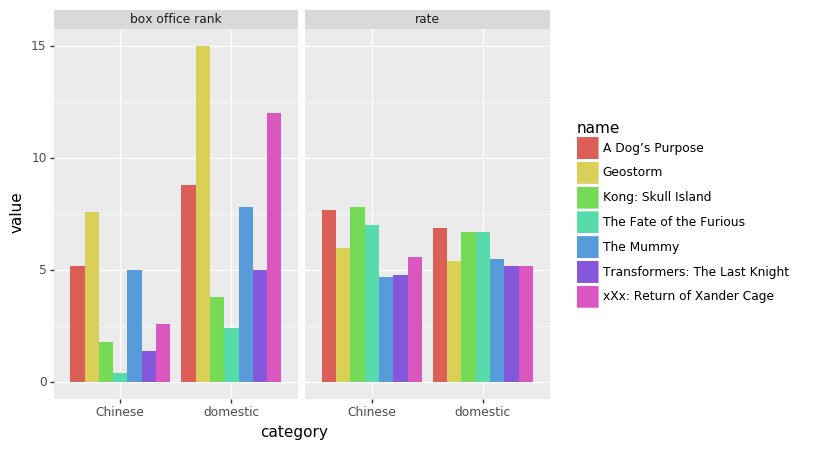

<ggplot: (-9223371858721774048)>

In [9]:
'''using bar plot conducting multi-variable comparison'''
p=gg.ggplot(newdf1, gg.aes('category', 'value',fill="name"))
pp=p+ gg.geom_bar(position='dodge',stat="identity")+ gg.facet_wrap('~valuename')
pp


* From this plot above, we use the rank of the box office instead of the value of the box office.
* By comparison, we can see that the relation of the rate and box office does not have a pattern.
* CONCLUSION: 
    Popularity and rating factors from IMDB and DOUBAN do not influence the box office to much.

### PART 2: ACTOR effect (Box Office value actor data overall analysis)

In [10]:
'''loading the actor data'''
df4=pd.read_csv("D:\\school in california\\Aucdavis\\second quarter\\141B\\final project\\data\\Actor.csv")
df4

,Name,Domestic(actor),International(actor),Worldwide(actor)
0,xXx: Return of Xander Cage,"$1,323,338,433","$3,830,289,378","$5,153,627,811"
1,xXx: Return of Xander Cage,$0,"$25,040,000","$25,040,000"
2,Geostorm,"$292,683,312","$283,633,664","$576,316,976"
3,Geostorm,$0,$0,"$33,700,160"
4,The Fate of the Furious,"$1,323,338,433","$3,830,289,378","$5,153,627,811"
5,The Fate of the Furious,"$100,990,648","$133,450,656","$234,441,304"
6,The Mummy,"$1,284,826,648","$2,552,489,126","$3,837,315,774"
7,The Mummy,$0,$0,"$80,101,125"
8,Transformers: The Last Knight,"$492,869,237","$234,728,472","$727,597,709"
9,Transformers: The Last Knight,$0,$0,$0


In [11]:
'''since we have a lot of missing value of the leading cast here, we use the same value from the same movie to fill in 0's '''
'''also, we use the international data to represent the Chinese influence of the actors'''
df4['Domestic(actor)'][1]=df4['Domestic(actor)'][0]
df4['Domestic(actor)'][3]=df4['Domestic(actor)'][2]
df4['Domestic(actor)'][7]=df4['Domestic(actor)'][6]
df4['Domestic(actor)'][9]=df4['Domestic(actor)'][8]
df4['Domestic(actor)'][10]=df4['Domestic(actor)'][11]
df4['International(actor)'][3]=df4['International(actor)'][2]
df4['International(actor)'][7]=df4['International(actor)'][6]
df4['International(actor)'][9]=df4['International(actor)'][8]
df4['International(actor)'][10]=df4['International(actor)'][11]
df4['Worldwide(actor)'][9]=df4['Worldwide(actor)'][8]
df4['Worldwide(actor)'][10]=df4['Worldwide(actor)'][11]
df4

,Name,Domestic(actor),International(actor),Worldwide(actor)
0,xXx: Return of Xander Cage,"$1,323,338,433","$3,830,289,378","$5,153,627,811"
1,xXx: Return of Xander Cage,"$1,323,338,433","$25,040,000","$25,040,000"
2,Geostorm,"$292,683,312","$283,633,664","$576,316,976"
3,Geostorm,"$292,683,312","$283,633,664","$33,700,160"
4,The Fate of the Furious,"$1,323,338,433","$3,830,289,378","$5,153,627,811"
5,The Fate of the Furious,"$100,990,648","$133,450,656","$234,441,304"
6,The Mummy,"$1,284,826,648","$2,552,489,126","$3,837,315,774"
7,The Mummy,"$1,284,826,648","$2,552,489,126","$80,101,125"
8,Transformers: The Last Knight,"$492,869,237","$234,728,472","$727,597,709"
9,Transformers: The Last Knight,"$492,869,237","$234,728,472","$727,597,709"


In [12]:
def myfun2(x):
    mm=x.str.split("$",1,expand=True)
    mm1=mm[1].str.replace(",","")
    return mm1

In [13]:
'''get rid of the dollar sign and the comma and rescale the number'''
mm1=myfun2(df4['Domestic(actor)'])
df4['Domestic(actor)']=[int(mm1[i])/(10**7) for i in range(0,len(mm1))]
mm2=myfun2(df4['International(actor)'])
df4['International(actor)']=[int(mm2[i])/(10**7) for i in range(0,len(mm2))]
df4

,Name,Domestic(actor),International(actor),Worldwide(actor)
0,xXx: Return of Xander Cage,132.333843,383.028938,"$5,153,627,811"
1,xXx: Return of Xander Cage,132.333843,2.504000,"$25,040,000"
2,Geostorm,29.268331,28.363366,"$576,316,976"
3,Geostorm,29.268331,28.363366,"$33,700,160"
4,The Fate of the Furious,132.333843,383.028938,"$5,153,627,811"
5,The Fate of the Furious,10.099065,13.345066,"$234,441,304"
6,The Mummy,128.482665,255.248913,"$3,837,315,774"
7,The Mummy,128.482665,255.248913,"$80,101,125"
8,Transformers: The Last Knight,49.286924,23.472847,"$727,597,709"
9,Transformers: The Last Knight,49.286924,23.472847,"$727,597,709"


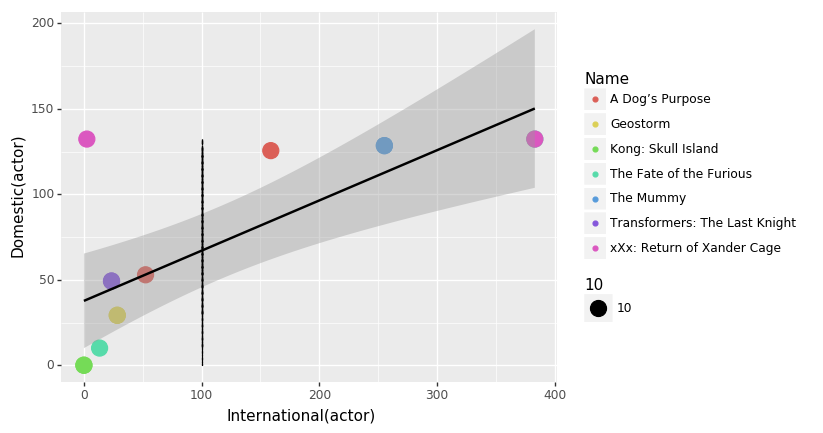

<ggplot: (178135222564)>

In [14]:
p=gg.ggplot(df4, gg.aes('International(actor)', 'Domestic(actor)'))
pp=p+gg.geom_point(df4,gg.aes(color='Name',size=10))+ gg.stat_smooth(method='lm')+gg.geom_line(gg.aes(x=100),linetype="dashed")
pp

* From the plot above, because we want to find whether the rank of actors(domestic and international) 
affects the box office of the movies or not
* An intuitive way is that if the difference between domestic rank and international rank for one actor is large, 
then it is probably the reason accounting for the difference in the share.
* Those movies are the movies have small international value but large domestic value. Hence,  the points on the left side of the dashed black line.
* Although only the movie return of the Xander case (with the purple point on the right) shows the international value created by this actor is much higher than his domestic one(actually he is a Chinese actor)
there is still reasonable to believe that actors do have effect on the box office. It is just not they all have higher international value than domestic one.

### PART 3 :DIRECTOR effect

* For the director part, I am going to make a detailed analysis about the overall ability of the director.
* i.e. Not only use one measure to assess the director but many different features for each director.

In [58]:
'''loading the detailed director data'''
df3=pd.read_csv("D:\\school in california\\Aucdavis\\second quarter\\141B\\final project\\data\\directordata.csv")
df3.head()
# df3["value"]

,record,rank,value,name
0,Top Grossing Director at the Domestic Box Offi...,975,"$33,700,160",D-J-Caruso
1,Top Grossing Producer at the Domestic Box Offi...,120,"$809,318,256",D-J-Caruso
2,Top Grossing Screenwriter at the Domestic Box ...,96,"$650,893,664",D-J-Caruso
3,Top Grossing Story Creator at the Domestic Box...,164,"$239,458,580",D-J-Caruso
4,Top Grossing Director at the International Box...,401,"$187,100,000",D-J-Caruso


In [59]:
'''cleaning for use of the plot'''
mm3=myfun2(df3['value'])
df3['value']=[int(mm3[i])/(10**5) for i in range(0,len(mm3))]


In [60]:
df3.head()

,record,rank,value,name
0,Top Grossing Director at the Domestic Box Offi...,975,337.00160,D-J-Caruso
1,Top Grossing Producer at the Domestic Box Offi...,120,8093.18256,D-J-Caruso
2,Top Grossing Screenwriter at the Domestic Box ...,96,6508.93664,D-J-Caruso
3,Top Grossing Story Creator at the Domestic Box...,164,2394.58580,D-J-Caruso
4,Top Grossing Director at the International Box...,401,1871.00000,D-J-Caruso



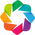

In [61]:
import holoviews as hv
import numpy as np
hv.notebook_extension('bokeh')

In [62]:
'''building interactive plot'''
%opts Points [width= 800] NdOverlay [legend_position='top']
irises = hv.Dataset(df3).to(hv.Points, vdims=hv.Dimension('value', range=(100, 1000)),kdims=['rank','value'])
# irises.redim(rank=dict(range=(500, 3000)), B=dict(range=(200, 600)))
irises.overlay()

C:\my own software install\anaconda3\lib\site-packages\bokeh\core\json_encoder.py:80: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(obj), np.float):


:NdOverlay   [record,name]
   :Points   [rank,value]   (value)

In [63]:
'''make it changeable for users to see different director seperately'''
irises.overlay() + irises

C:\my own software install\anaconda3\lib\site-packages\bokeh\core\json_encoder.py:80: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(obj), np.float):


:Layout
   .NdOverlay.I :NdOverlay   [record,name]
      :Points   [rank,value]   (value)
   .HoloMap.I   :HoloMap   [record,name]
      :Points   [rank,value]   (value)

* By putting in different names and categories of the director data, we can actually see that though the overall value
of those directors are good, there is actually gain difference among each of them and also difference among varies categories.
* Therefore, it is not reasonable to just average those values to arrive at a single score for each director.
* Therefore, we give the reader the freedom to decide how to evaluate each dorector.
* For studying whether the director effect is significant for box office or not, we only concentrate on the total box office of the movies in 2017 made by them.

In [21]:
'''loading the total box office value director data'''
df5=pd.read_csv("D:\\softdata_file\\GITHUB\\sta141b-proj--zhang-zhao\\director.csv")
df5

,Name,Domestic(director),International(director),Worldwide(director)
0,xXx: Return of Xander Cage,"$341,032,453","$545,426,963","$886,459,416"
1,Geostorm,"$809,318,256","$1,480,685,100","$2,290,003,356"
2,The Fate of the Furious,"$757,018,128","$1,241,886,899","$1,998,905,027"
3,The Mummy,"$1,738,416,625","$2,258,987,757","$3,997,404,382"
4,Transformers: The Last Knight,"$1,255,682,482","$1,587,645,612","$2,843,328,094"
5,Kong: Skull Island,"$169,368,312","$393,132,024","$562,500,336"
6,A Dog’s Purpose,"$529,512,669","$523,863,020","$1,053,375,689"


In [22]:
'''get rid of the dollar sign and the comma and rescale the number'''
mm4=myfun2(df5['Domestic(director)'])
df5['Domestic(director)']=[int(mm4[i])/(10**7) for i in range(0,len(mm4))]
mm5=myfun2(df5['International(director)'])
df5['International(director)']=[int(mm5[i])/(10**7) for i in range(0,len(mm5))]

df5

,Name,Domestic(director),International(director),Worldwide(director)
0,xXx: Return of Xander Cage,34.103245,54.542696,"$886,459,416"
1,Geostorm,80.931826,148.068510,"$2,290,003,356"
2,The Fate of the Furious,75.701813,124.188690,"$1,998,905,027"
3,The Mummy,173.841663,225.898776,"$3,997,404,382"
4,Transformers: The Last Knight,125.568248,158.764561,"$2,843,328,094"
5,Kong: Skull Island,16.936831,39.313202,"$562,500,336"
6,A Dog’s Purpose,52.951267,52.386302,"$1,053,375,689"


In [23]:
'''combine with the bos office of those 7 movies'''
'''creating a new dataframe'''
Chinabox=df2['China Box Office']
Domesticbox=df2['Domestic Box Office']

Chinabox=[Chinabox[i]/(10**6) for i in range(0,len(Chinabox))]

Domesticbox=[Domesticbox[i]/(10**6) for i in range(0,len(Domesticbox))]

data={"Name":df5['Name'],'China box office':Chinabox,'Domestic box office':Domesticbox,"director international":df5['International(director)'],'director domestic':df5['Domestic(director)']}
newdf5=pd.DataFrame(data)
newdf5

,China box office,Domestic box office,Name,director domestic,director international
0,163.65,44.898413,xXx: Return of Xander Cage,34.103245,54.542696
1,65.30,33.700160,Geostorm,80.931826,148.068510
2,392.10,225.764765,The Fate of the Furious,75.701813,124.188690
3,91.50,80.101125,The Mummy,173.841663,225.898776
4,229.46,130.168683,Transformers: The Last Knight,125.568248,158.764561
5,172.30,172.558876,Kong: Skull Island,16.936831,39.313202
6,88.73,64.321890,A Dog’s Purpose,52.951267,52.386302


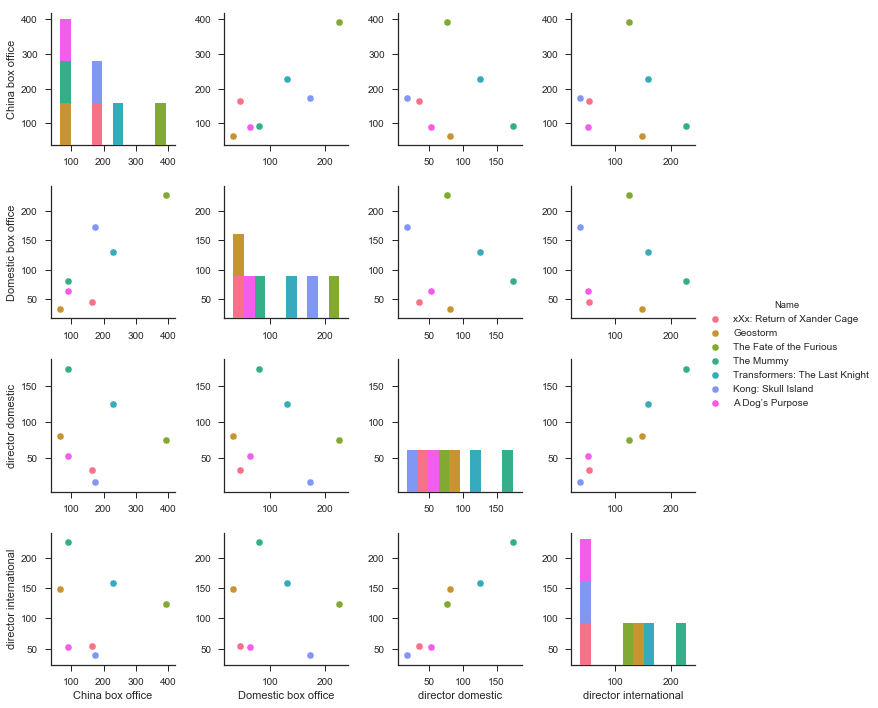

In [24]:
'''creating the plot'''
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(newdf5, hue="Name")

* From this plot, we can clearly see that there is no obvious pattern between the director personal value and the box office of the 7 movies,
i.e.check the (1,4) and (2,3) position of the pairwise plot above.
*  However, the relationship between the domestic value and the international value of the director himself(or herself), is pretty linear,
i.e. the ability of the director at home and oversea remains the same. check the (3,4) and (4,3) position.

To see the linear relationship more clearly, we check for domestic relationship and inernational relationship below seperately.

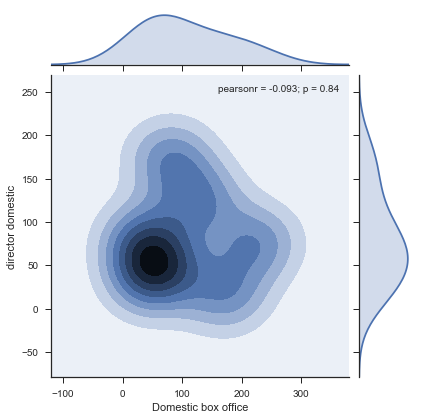

In [25]:
sns.jointplot(x=newdf5['Domestic box office'], y=newdf5['director domestic'], data=newdf5, kind="kde")

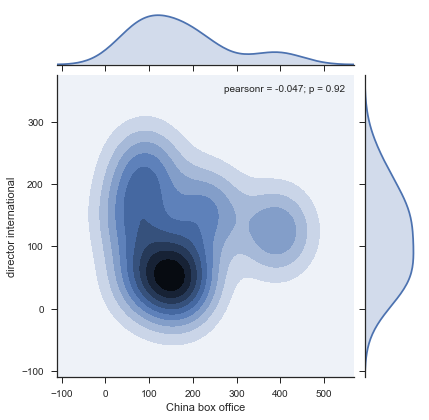

In [26]:
sns.jointplot(x=newdf5['China box office'], y=newdf5['director international'], data=newdf5, kind="kde")

CONCLUSION: 
    Although the director effect is not apparent, the  domestic value created by the director is parallel with his or her international value created.

## PART 4 :ACTOR effect (detailed inside features analysis)

* Same idea as the director part, because for each actor, it is really hard for us to give an overall 
score about his or her domestic or international influence.
* However, since we have more data for the actors, the intuitive way is that we might be able to 
use them to build a model to see different features of the actors whether have influence for the 
box office or not.

In [4]:
'''checking the actordata first'''

df6=pd.read_csv('D:\\school in california\\Aucdavis\\second quarter\\141B\\final project\\data\\actordata.csv')


In [80]:
'''split the data for each actor since each data does not have the same length'''
dt1=df6.iloc[0:34,]
dt2=df6.iloc[34:54,]
dt3=df6.iloc[54:54+18,]
dt4=df6.iloc[72:82,]
dt5=df6.iloc[82:82+34,]
dt6=df6.iloc[82+34:82+34+39,]
dt7=df6.iloc[82+34+39:82+34+39+39,]
dt8=df6.iloc[82+34+39+39:82+34+39+39+6]
dt9=df6.iloc[82+34+39+39+6:82+34+39+39+6+35,]
dt10=df6.iloc[82+34+39+39+6+35:82+34+39+39+6+35+7]
dt11=df6.iloc[82+34+39+39+6+35+7:82+34+39+39+6+35+7+6]
dt12=df6.iloc[82+34+39+39+6+35+7+6:82+34+39+39+6+35+7+6+41]
dt13=df6.iloc[82+34+39+39+6+35+7+6+41:82+34+39+39+6+35+7+6+41+12]
dt14=df6.iloc[82+34+39+39+6+35+7+6+41+12:82+34+39+39+6+35+7+6+41+12+5]


In [6]:
'''we will use the rank here to represent the value because by checking the website(The Numbers),some numbers of the value column are actually the total number of the actors engaged in the rank'''
def mydtfun(ndt):
    '''this fuction is used to transpose the data since we need to use the common feature shared by actors'''
    ndt=ndt.iloc[:,0:2]
    ndt=pd.DataFrame.transpose(ndt)
    ndt= ndt.reset_index()
    ndt=ndt.drop('index',1)
    ndt.columns=ndt.iloc[0,:]
    ndt=ndt.iloc[1:]
    return ndt
    

In [7]:
'''try using the same column to merge the data'''
'''however, we get error here because the columns are all differnt!'''
'''those not run codes are the codes for merge the data'''
list=[mydtfun(dt1),mydtfun(dt2),mydtfun(dt3),mydtfun(dt4),mydtfun(dt5),mydtfun(dt6),mydtfun(dt7),mydtfun(dt8),mydtfun(dt9),mydtfun(dt10),mydtfun(dt11),mydtfun(dt13),mydtfun(dt14)]
# for x in list:
#     dt=pd.merge(mydtfun(dt12),x,how="left")
# dt 



How could that possibly happen? Well it is because that though the first part of the column names are the same,
the part inside the () is different, for example, for column named Top Grossing Assistant Director at the International Box Office (Rank 701-800),
the number here based on the number inside the (), i.e. if an actor has score 21, it is the 21st from the range 701-800 for this particular column(which is 721 then).


In conclusion,  our data is not sufficient enough to analyze the actor effect inside the actor data.

Therefore, we analyze each actor or actress for the movie he or she participated in individually.

First of all, since for each movie, we use one actress and one actor, by checking the number of the items shown on the website, 
we can actually have an overall conclusion of the leading cast ability.

In [20]:
numbers=[34,20,18,10,34,39,39,6,35,7,6,41,12,5]
female=numbers[1::2]
male=numbers[0::2]
labels1=["Vin-Diesel","Donnie-Yen","Gerard-Butler","Talitha-Bateman","Vin-Diesel","Dwayne-Johnson","Tom-Cruise","Annabelle-Wallis","Mark-Wahlberg","Shia-LaBeouf","Brie-Larson","Samuel-L-Jackson","Michael-Bay","Lasse-HallstrA-m"]
labels4=["Vin-Diesel  xXx: Return of Xander Cage","Donnie-Yen  xXx: Return of Xander Cage","Gerard-Butler  Geostorm","Talitha-Bateman  Geostorm","Vin-Diesel  The Fate of the Furious","Dwayne-Johnson  The Fate of the Furious","Tom-Cruise  The Mummy","Annabelle-Wallis  The Mummy","Mark-Wahlberg  Transformers: The Last Knight","Shia-LaBeouf  Transformers: The Last Knight","Brie-Larson  Kong: Skull Island","Samuel-L-Jackson  Kong: Skull Island","Michael-Bay  A Dog’s Purpose","Lasse-HallstrA-m  A Dog’s Purpose"]
labels2=labels4[1::2]
labels3=labels4[0::2]


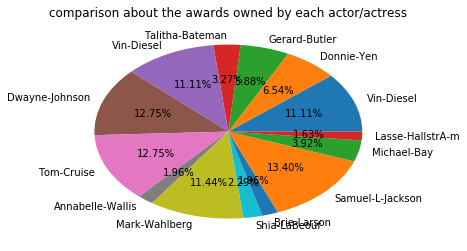

In [16]:
import numpy as np     
import matplotlib.pyplot as plt      
fig = plt.figure()  
plt.pie(numbers,labels=labels1,autopct='%1.2f%%')   
plt.title("comparison about the awards owned by each actor/actress")  
plt.show()    

From this pie chart above, we can actually see that the difference of the proportions are huge,which
means that the ability or we can say the "rank" of the actors is so different, although those movies are
having domestic box office less than Chinese one.

Below, we focus on the gender difference. 

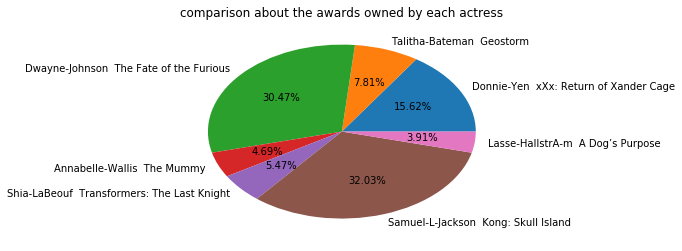

In [22]:
fig = plt.figure()  
plt.pie(female,labels=labels2,autopct='%1.2f%%')   
plt.title("comparison about the awards owned by each actress")  
plt.show()   

Except for Dawyne-Johnson and Samuel-L-Jackson, who are very popular actresses, others seem to have 
similar number of awards.


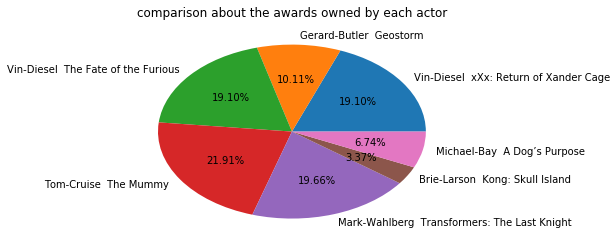

In [23]:
fig = plt.figure()  
plt.pie(male,labels=labels3,autopct='%1.2f%%')   
plt.title("comparison about the awards owned by each actor")  
plt.show()   

For actors, we can see that the "outliers" are Brie-Larson and "Michael-Bay".
Below, we compare between actors and actresses.

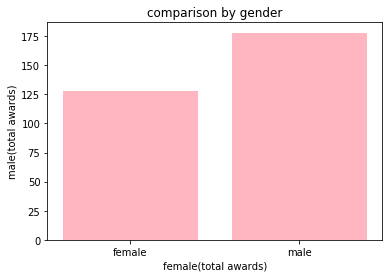

In [27]:
X=["female","male"]
Y=[sum(female),sum(male)]
plt.bar(X,Y,color="lightpink")  
plt.xlabel("female(total awards)")  
plt.ylabel("male(total awards)")  
plt.title("comparison by gender")  
plt.show()    

It is interesting that the total number of male awards is almost twice than that of the female.

Secondly,to study whether actor effect(evaluated by number of awards) contributes to the difference between
the domestic box office and the Chinese one, we plot the domestic awards V.S. the box office.

In [42]:
import numpy as np

In [43]:
def domestic(x):
    is_domestic=x.iloc[:,0].str.contains("Domestic")
    ndt1=x.loc[is_domestic,:]
    '''here, we use the average value to represent the overall rank'''
    a1=np.mean(ndt1["rank"])
    return a1

In [81]:
a1=np.mean([domestic(dt1)]+[domestic(dt2)])
a2=np.mean([domestic(dt3)]+[domestic(dt4)])
a3=np.mean([domestic(dt5)]+[domestic(dt6)])
a4=np.mean([domestic(dt7)]+[domestic(dt8)])
a5=np.mean([domestic(dt9)]+[domestic(dt10)])
a6=np.mean([domestic(dt11)]+[domestic(dt12)])
a7=np.mean([domestic(dt13)]+[domestic(dt14)])

In [87]:
actor_domestic_overallrank=[a1,a2,a3,a4,a5,a6,a7]
actor_domestic_overallrank=[int(item)/(10**2) for item in actor_domestic_overallrank]
actor_domestic_overallrank

[9.31, 28.07, 1.27, 19.03, 1.06, 8.53, 11.59]

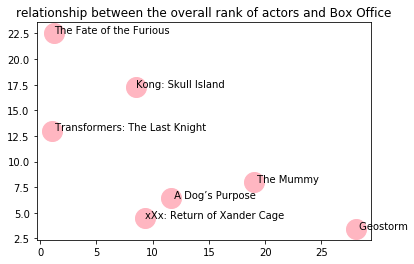

In [97]:

movie_box_office=df2['Domestic Box Office']/(10**7)
plt.scatter(actor_domestic_overallrank,movie_box_office,color="lightpink",s=400)  
plt.title("relationship between the overall rank of actors and Box Office") 
labels=["xXx: Return of Xander Cage"," Geostorm", "The Fate of the Furious"," The Mummy"," Transformers: The Last Knight","Kong: Skull Island"," A Dog’s Purpose"]
for i in range(0,7):
    xy=(actor_domestic_overallrank[i],movie_box_office[i])
    plt.annotate(labels[i],xy=xy)
plt.show()  

As we can see from the scatter plot above, the rank of the leading cast has the negative relationship with 
the Box Office, especially true for the movies "The Fate of the Furious"," The Mummy"," Geostorm" and "Kong: Skull Island".
Therefore, it is reasonable for us to conclude that the lower the rank of the leading cast is, the lower the Box Office the movie has.


## Part 5: social media effect by twitter data analysis

In [99]:
df7=pd.read_csv("D:\\softdata_file\\GITHUB\\sta141b-proj--zhang-zhao\\twitter.csv")
df7

,Name,Tweets,Following,Followers,Likes
0,xXx: Return of Xander Cage,419,46,2,286
1,Geostorm,128,5,2,2
2,The Fate of the Furious,37,834,941,147
3,The Mummy,219,19,10253,168
4,Transformers: The Last Knight,241,231,265554,2023
5,Kong: Skull Island,569,13,32823,367
6,A Dog’s Purpose,1057,22,8039,148


In [140]:
df7['Tweets']/10

0     41.9
1     12.8
2      3.7
3     21.9
4     24.1
5     56.9
6    105.7
Name: Tweets, dtype: float64

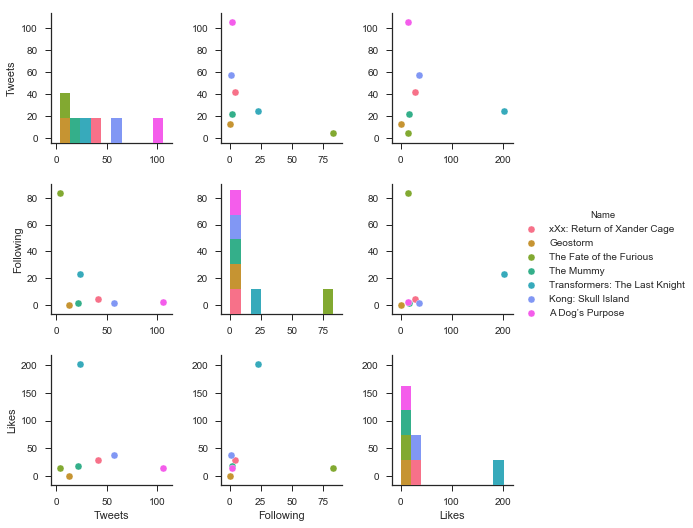

In [145]:
import seaborn as sns
sns.set(style="ticks")
newdf7=pd.DataFrame(columns=['Name','Tweets','Following','Likes'])
newdf7['Tweets']=df7['Tweets']/10
newdf7['Name']=df7['Name']
newdf7['Following']=df7['Following']/10
# newdf7['Followers']=df7['Followers']/(10**4)
newdf7['Likes']=df7['Likes']/10
sns.pairplot(newdf7, hue="Name")

From this plot, we can actually see that the relationships among each items inside the twitter data are
not good, mostly because there exists huge difference. Therefore, for further study, we will only use the 
column "tweets" and "likes".

In [135]:
import numpy as np

from bokeh.plotting import figure, show, output_file

N = 7
x = df7["Tweets"]
y = movie_box_office
radii = df7['Likes']/5
colors = ["green","black","blue","red","yellow","pink","purple"]

hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("radius", "@radius"),
    ("fill color", "$color[hex, swatch]:fill_color"),
    ("foo", "@foo"),
    ("bar", "@bar")
])


TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)

# output_file("color_scatter.html", title="color_scatter.py example")

show(p)  # open a browser

* From this number of tweets V.S. Box Office(domestic, since in China there are not so many people use twitter)plot,
whose size represents the number of likes and color represents different movies,
we can see that there is no linear relationship between them.
* Also,it is amazing that we kind of "lost" a point because its size is too small compared with others,
i.e. the movie "Geostorm" . The reason behind it might be most of the rest are series movies while this one is not.
* In conclusion, there is no obvious relationship between the popularity among the social media app twitter and the Box Office.

 ### Summary

By comparing those 4 features that may influence the Box Office, we can conclude that the popularity effect and the 
social media twitter effects do not influence the Box Office. However, the actor effect and the director effect can not be ignored ,
although the director effect is not as apparent as the actor effect.
